In [194]:
import numpy as np
import matplotlib.pyplot as plt

In [195]:
# 40000 samples
def loadDigitsMNIST():
	from keras.datasets import mnist
 
	(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
	X_train = X_train.reshape(X_train.shape[0], -1)
	
 
	X = []
	Y = []
 
	iters = 0
	maxx = 60000
	for i, y in zip(X_train, Y_train):
		if True:
		# if y == 2 or y == 3 or y == 4:
			if iters > maxx:
				break
			iters += 1
			Y.append(y)
			x_i = []
			for j in i:
				if j > 127:
					x_i.append(1)
				else:
					x_i.append(0)
			X.append(x_i)
 
	return np.array(X), np.array(Y)
x,y = loadDigitsMNIST()

ModuleNotFoundError: No module named 'tensorflow'

In [191]:
y_new = []
for i in range(0,y.shape[0]):
    y_new.append(int(y[i]))
y = np.array(y_new)
y

array([5, 0, 4, ..., 4, 5, 6])

In [49]:
def Prob(x,mu,k):
    p = 1
    for i in range(0,x.shape[0]):
        p *= k*(mu[i] ** x[i])*(1- mu[i])**(1-x[i])
    return p

In [50]:
def E(p,pi,k):
    gamma = np.zeros((x.shape[0],pi.shape[0]))
    for i in range(0,x.shape[0]):
        for j in range(0,pi.shape[0]):
            gamma[i][j] = pi[j] * Prob(x[i], p[j],k)
        gamma[i] /= np.sum(gamma[i])

    return gamma

In [51]:
def M(gamma):
    pi = np.sum(gamma,axis=0)/x.shape[0]

    p = x.T @ gamma
    p = p.T

    n = p.T / (pi*x.shape[0])
    p = n.T
    
    return p, pi

In [52]:
p = np.random.rand(10,784)
pi = np.random.rand(10)
factor = 1/np.sum(pi)
pi = pi * factor
np.sum(pi)
p.shape

(10, 784)

In [53]:
k = 2
for i in range(0,100):
    gamma = E(p,pi,k)
    p, pi  = M(gamma)

In [57]:
pi

array([0.10386978, 0.3580792 , 0.000999  , 0.26142144, 0.26264356,
       0.000999  , 0.001998  , 0.001998  , 0.000999  , 0.00699301])

In [58]:
p

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

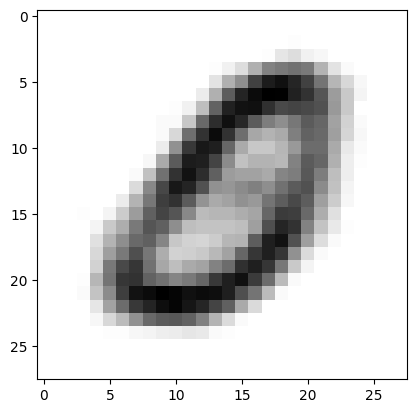

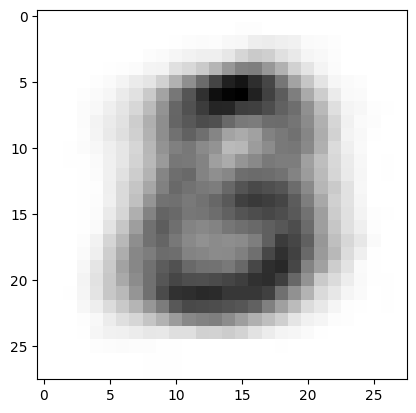

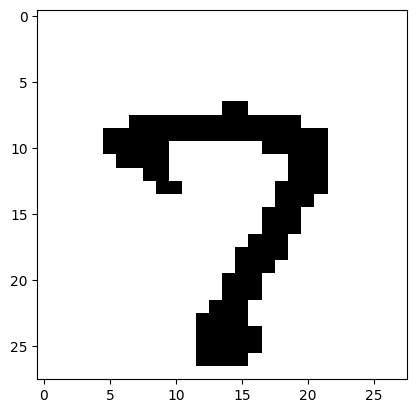

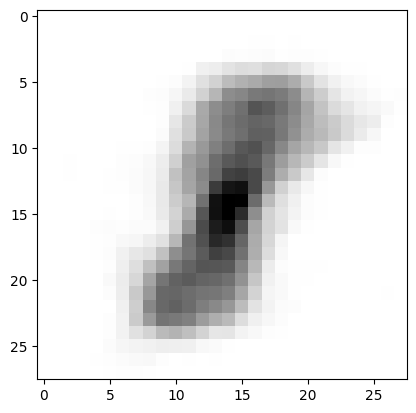

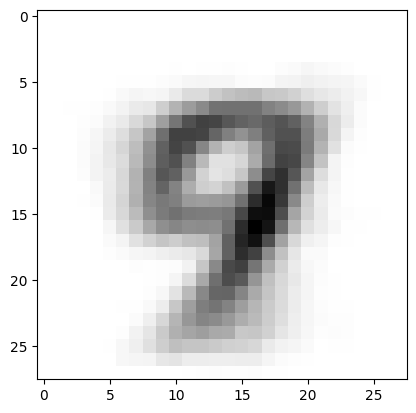

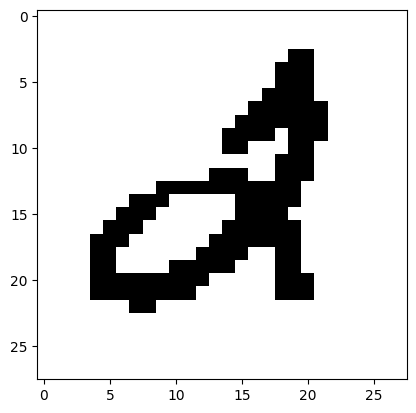

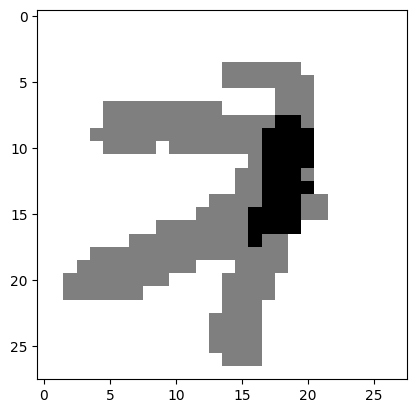

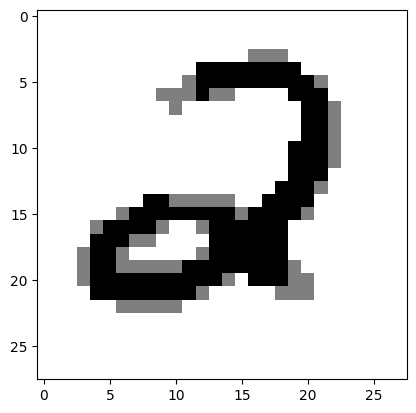

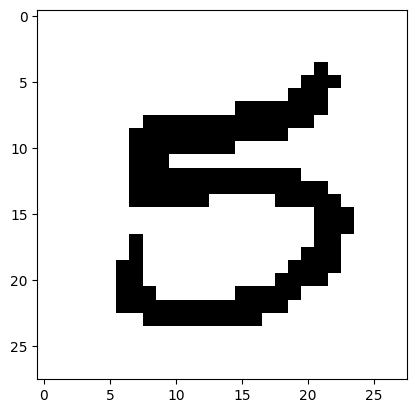

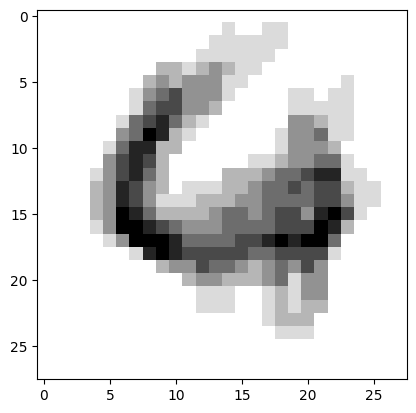

In [59]:
for mean in p:
    plt.imshow(mean.reshape(28,28), cmap = plt.cm.gray_r, interpolation='nearest')
    plt.show()